# NLP Final Project

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## TASKS

###   2.1 Corpus Creation

In [127]:
# We create a NLTK corpus from this text file
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')

##### Word Tokenization

In [128]:
#Applying tokenization
raw_text = corpus.raw()
tokens = nltk.word_tokenize(raw_text)
print(tokens[:50])

['Transcript', ':', '[', ']', '01', 'Sheriff', 'Woody', '[', ']', '[', 'The', 'Walt', 'Disney', 'Pictures', 'logo', 'plays', ',', 'except', 'the', 'castle', 'is', 'in', 'CGI', ',', 'while', 'the', 'camera', 'zooms', 'out', 'from', 'its', 'gate', '.', 'When', 'the', 'logo', 'completes', ',', 'it', 'zooms', 'out', 'until', 'it', 'fades', 'into', 'a', 'kid', "'s", 'bedroom', ',']


##### Sentence Tokenization

In [129]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['Transcript:[]\n01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the camera zooms out from its gate.', "When the logo completes, it zooms out until it fades into a kid's bedroom, with boxes made to look like buildings which are placed in different areas.", 'A kid, Andy Davis, holds a Mr.', 'Potato Head toy in front of one of them]\nAndy (as One-Eyed Bart): Alright, everyone!', 'This is a stick-up!', "Don't anybody move!", 'Now empty that safe!', '[Andy shakes a piggy bank (Hamm) and a few coins fall out]\nAndy (as One-Eyed Bart): [chuckles] Money, money, money!', '[Andy makes Potato Head (One-Eyed Bart] ""kiss"" the coins]\nAndy (as Bo Peep): Stop it!', 'Stop it, you mean old potato!']


---

##### POS Tagging

In [130]:
# Define a function to convert NLTK's POS tags to wordnet's POS tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Use noun as a default

    
# Applying POS tagging
pos_tags = nltk.pos_tag(tokens)

---

#### Lemmatization

In [131]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if word.isalpha() and word.lower() not in stop_words]

# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)

#### Word Frequency

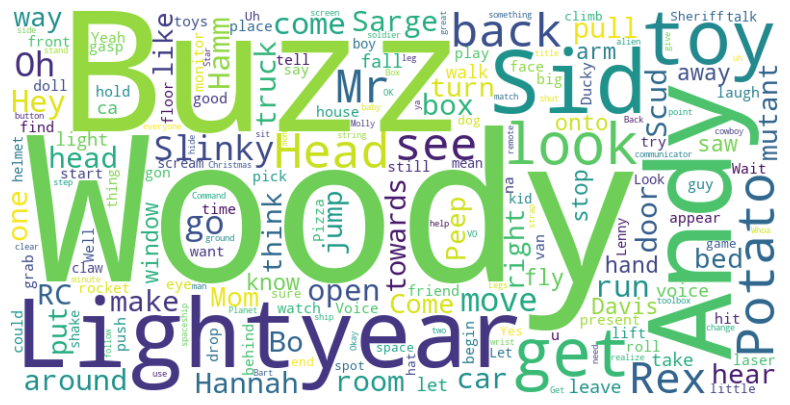

In [132]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Woody: 674 times
Buzz: 503 times
Andy: 193 times
Lightyear: 178 times
Sid: 149 times
toy: 125 times
get: 124 times
look: 122 times
Potato: 96 times
Head: 96 times


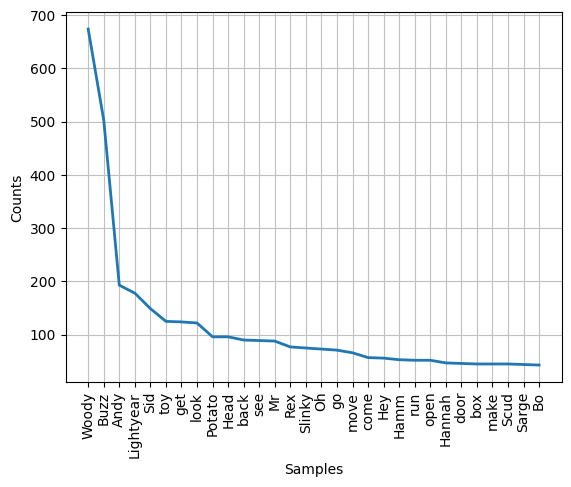

In [133]:
# We get the most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

#### Bigrams

In [134]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of trigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('Buzz', 'Lightyear'): 0.016246653743192098
('Potato', 'Head'): 0.008861811132650235
('Mr', 'Potato'): 0.007477153143173636
('Woody', 'Buzz'): 0.005261700360011078
('Bo', 'Peep'): 0.002861626511584972
('mutant', 'toy'): 0.002307763315794332
('Buzz', 'Buzz'): 0.0021231422505307855
('Woody', 'look'): 0.0020308317178990122
('Buzz', 'look'): 0.0017539001200036924
('Woody', 'Oh'): 0.0017539001200036924


#### Trigrams

In [135]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigrams divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('Mr', 'Potato', 'Head'): 0.007477153143173636
('Buzz', 'Lightyear', 'Woody'): 0.001292347456844826
('Woody', 'Voice', 'Box'): 0.0009231053263177328
('Buzz', 'Buzz', 'Lightyear'): 0.0007384842610541863
('Buzz', 'Lightyear', 'Buzz'): 0.000646173728422413
('Head', 'Mr', 'Potato'): 0.000646173728422413
('Potato', 'Head', 'Mr'): 0.000646173728422413
('Woody', 'Buzz', 'Lightyear'): 0.0005538631957906397
('Woody', 'Buzz', 'look'): 0.0005538631957906397
('Lightyear', 'Buzz', 'Lightyear'): 0.0004615526631588664
